# Load Data and Preprocessing

In [ ]:
import pandas as pd
import os
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

# Set the default DPI
plt.rcParams['figure.dpi'] = 100  

well_info = pd.read_csv('well-loc.tsv', sep='\t')

# Path to the sensor data directory
sensor_data_path = 'sensor-data'

# List all TSV files in the directory
sensor_data_files = [f for f in os.listdir(sensor_data_path) if f.endswith('.tsv')]

# Sort the sensor_data_files list
sensor_data_files.sort(key= lambda x: int(x.split('.')[0]))

# Load and concatenate all sensor data files into one DataFrame
sensor_data_list = [pd.read_csv(os.path.join(sensor_data_path, file), sep='\t',
                                na_values="-9999") for file in sensor_data_files]


# Reset the index of the well_loc DataFrame to Well, X, Y
well_info.rename(columns={'井': 'Well'}, inplace=True)

# Reset the index of the sensor data DataFrame to Depth, Porosity, Hydrate Saturation
for idx, _ in enumerate(sensor_data_list):
	sensor_data_list[idx].columns = ['Depth', 'Porosity', 'Hydrate Saturation']

print(well_info.head())  # Display the first few rows to verify it's loaded correctly
print(sensor_data_list[0].head())  # Display the first few rows to verify it's loaded correctly

In [ ]:
# Show the summary of the dataset
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns  # For enhanced visualizations

# Assuming previous code has already been run and data is loaded

# 1. Descriptive Statistics
print("Descriptive Statistics for Well Information:")
print(well_info.describe())
print("\nDescriptive Statistics for Sensor Data:")
for idx, sensor_data in enumerate(sensor_data_list):
    print(f"\nSensor Data File {idx + 1}:")
    print(sensor_data.describe())

# 2. Data Quality Checks
print("\nChecking for missing values in Well Information:")
print(well_info.isnull().sum())
print("\nChecking for missing values in Sensor Data:")
for idx, sensor_data in enumerate(sensor_data_list):
    print(f"\nSensor Data File {idx + 1} Missing Values:")
    print(sensor_data.isnull().sum())

print("\nChecking for duplicate rows in Well Information:")
print(well_info.duplicated().sum())
for idx, sensor_data in enumerate(sensor_data_list):
    print(f"\nSensor Data File {idx + 1} Duplicate Rows:")
    print(sensor_data.duplicated().sum())

# 3. Correlation Analysis
# Assuming sensor data has common columns that can be concatenated for correlation analysis
if len(sensor_data_list) > 0:
    combined_sensor_data = pd.concat(sensor_data_list, ignore_index=True)
    plt.figure(figsize=(8, 6))
    sns.heatmap(combined_sensor_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix of Combined Sensor Data')
    plt.show()

# Note: Ensure all plots are properly displayed
plt.show()


In [ ]:
negative_data = []
for idx, sensor_data in enumerate(sensor_data_list):
    condition = (sensor_data['Hydrate Saturation'] < 0)
    negative_data.append(len(sensor_data[condition]) / len(sensor_data))

# Plot the number of negative data points
fig = go.Figure(data=[go.Bar(x=sensor_data_files, y=negative_data)])
fig.update_layout(title_text='Percentage of negative Hydrate Saturation points in each sensor data file')
fig.show()

# Claculate total data point amount in the sensor data
total_data_points = 0
for idx, sensor_data in enumerate(sensor_data_list):
    total_data_points += len(sensor_data)
    
total_data_points

In [ ]:
negative_data = []
for idx, sensor_data in enumerate(sensor_data_list):
    condition = (sensor_data['Porosity'] < 0)
    negative_data.append(len(sensor_data[condition]) / len(sensor_data))

# Plot the number of negative data points
fig = go.Figure(data=[go.Bar(x=sensor_data_files, y=negative_data)])
fig.update_layout(title_text='Percentage of negative Porosity data points in each sensor data file')
fig.show()


In [ ]:
# Test how many data points left if we drop the negative data points
total_data_points_after_drop = 0
for idx, sensor_data in enumerate(sensor_data_list):
    condition = (sensor_data['Hydrate Saturation'] >= 0)
    sensor_data = sensor_data[condition]
    total_data_points_after_drop += len(sensor_data)
total_data_points_after_drop

In [ ]:
# Check the not a NaN count of the other columns in the sensor data which has negative hydrate saturation

# Count rows contains negative hydrate saturation and no NaN in total
not_nan_count = 0
for idx, sensor_data in enumerate(sensor_data_list):
    condition = sensor_data['Hydrate Saturation'] < 0
    not_nan_count += len(sensor_data[condition].dropna())
print(not_nan_count)
    

In [ ]:
for idx, sensor_data in enumerate(sensor_data_list):
    sensor_data = sensor_data[sensor_data['Porosity'] <= 1.0]
    sensor_data = sensor_data[sensor_data['Hydrate Saturation'] <= 1.0]
    sensor_data_list[idx] = sensor_data
    
# Drop the rows containing values smaller than 0.0 except for the Depth column
for idx, sensor_data in enumerate(sensor_data_list):
    sensor_data = sensor_data[sensor_data['Porosity'] >= 0]
    sensor_data = sensor_data[sensor_data['Hydrate Saturation'] >= 0]
    sensor_data_list[idx] = sensor_data
    

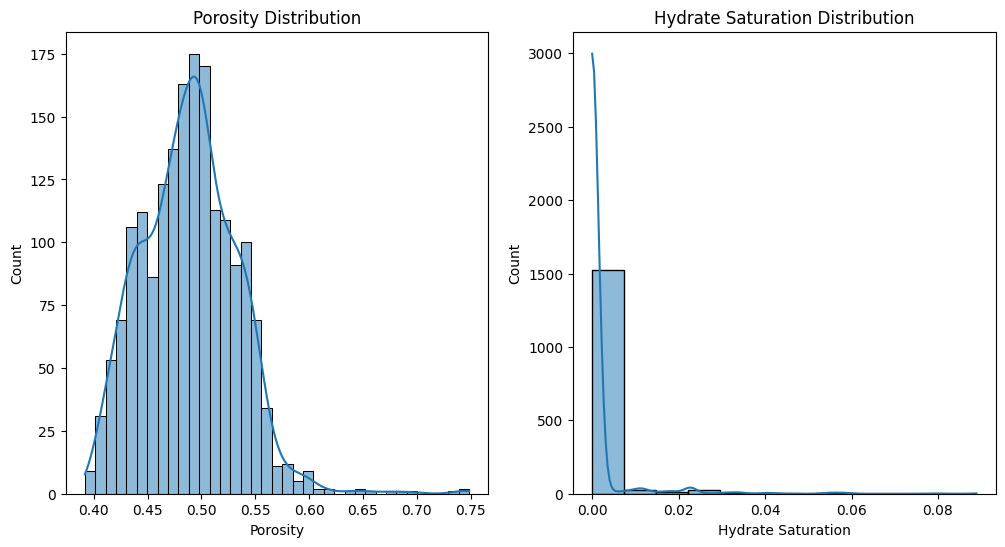

In [17]:
# Plot the distribution of the cleaned data
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(sensor_data_list[0]['Porosity'], kde=True, ax=ax[0])
ax[0].set_title('Porosity Distribution')
sns.histplot(sensor_data_list[0]['Hydrate Saturation'], kde=False, ax=ax[1])
ax[1].set_title('Hydrate Saturation Distribution')
plt.show()
